In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='train',
                          categories=['rec.autos', 'rec.sport.baseball'],
                          remove=('headers', 'footers', 'quotes'))

texts = data.data
print(f"Liczba dokumentów: {len(texts)}")


Liczba dokumentów: 1191


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)

print(f"TF-IDF macierz: {tfidf_matrix.shape}")


TF-IDF macierz: (1191, 1000)


In [8]:
import nltk
nltk.download('punkt', download_dir='C:/nltk_data')
nltk.data.path.append('C:/nltk_data')

[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [ ]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

sentences = [word_tokenize(doc.lower()) for doc in texts if isinstance(doc, str)]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=5)

print("Podobieństwo między 'car' a 'engine':", model.wv.similarity('car', 'engine'))
print("Najbardziej podobne do 'baseball':", model.wv.most_similar('baseball'))


In [ ]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

sentences = [s for s in sentences if len(s) > 5]

dictionary = Dictionary(sentences)
corpus = [dictionary.doc2bow(s) for s in sentences]

lda = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

for idx, topic in lda.print_topics():
    print(f"Temat {idx}: {topic}")


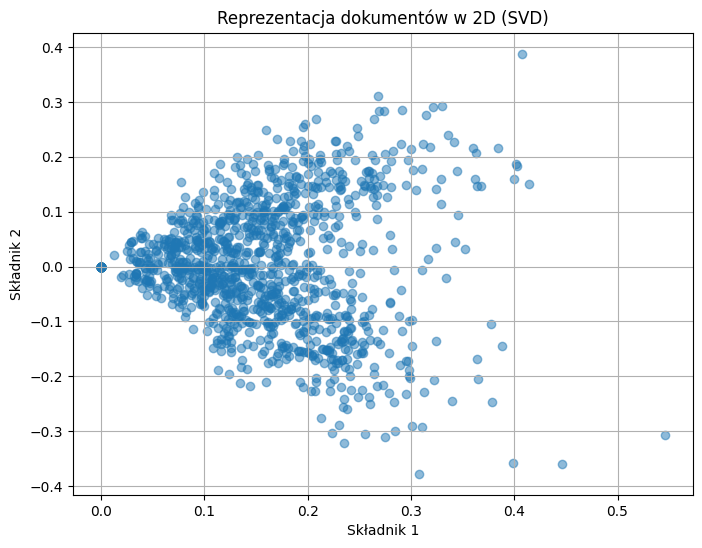

In [11]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(tfidf_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5)
plt.title("Reprezentacja dokumentów w 2D (SVD)")
plt.xlabel("Składnik 1")
plt.ylabel("Składnik 2")
plt.grid(True)
plt.show()
